In [7]:
import os
import sys
import pathlib
import pickle as pkl
import json
import itertools

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

import src.utils.time
import src.utils.dict
import src.utils.comps
import src.utils.module

from time import time
from datetime import datetime

import pprint
import math

import src.comps.heads_pyramid_2

In [8]:
def load_json_dict(
        json_filename
        ):

    with open(json_filename, 'r') as json_file:
        json_dict = json.load(json_file)

    return json_dict

In [9]:
exp_data_all = {}

In [10]:
data_subdir_name = "ret_train_pyr_2"
backbone_name = "convnext_t_s1"
exp_name_list = [
    "exp_010_old",
    "exp_010_new"
]
    
#

exp_data_all[data_subdir_name] = {}
exp_data_all[data_subdir_name][backbone_name] = {}

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", data_subdir_name, backbone_name)

for exp_name in exp_name_list:

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_1__data.json")
    exp_data = load_json_dict(exp_filename)

    exp_data_all[data_subdir_name][backbone_name][exp_name] = exp_data

In [11]:
exp_data_all["ret_train_pyr_2"]["convnext_t_s1"].keys()

dict_keys(['exp_010_old', 'exp_010_new'])

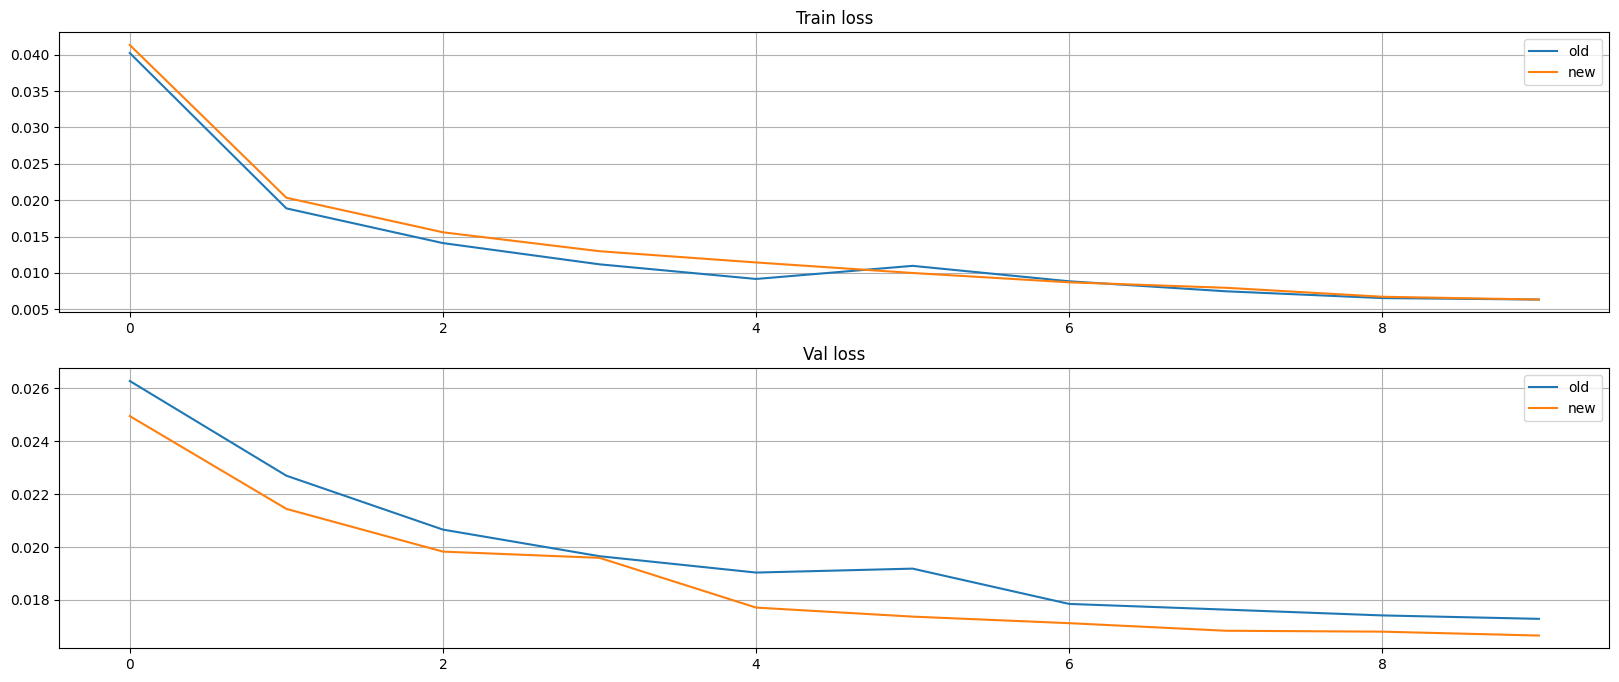

In [12]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 8))

exp_data = exp_data_all["ret_train_pyr_2"]["convnext_t_s1"]["exp_010_old"]

train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]]
val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]]

axs[0].plot(range(len(train_loss_list)), train_loss_list, label="old")
axs[1].plot(range(len(val_loss_list)), val_loss_list, label="old")

exp_data = exp_data_all["ret_train_pyr_2"]["convnext_t_s1"]["exp_010_new"]

train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]]
val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]]

axs[0].plot(range(len(train_loss_list)), train_loss_list, label="new")
axs[1].plot(range(len(val_loss_list)), val_loss_list, label="new")

axs[0].grid()
axs[1].grid()

axs[0].set_title("Train loss")
axs[1].set_title("Val loss")

axs[0].legend()
axs[1].legend()

plt.show()